In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the training dataset
train = pd.read_csv("data/drugsComTrain_raw.csv")
# Load the testing dataset
test = pd.read_csv("data/drugsComTest_raw.csv")

# Check dataset dimensions
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# first 5 rows
train.head()

Training set shape: (161297, 7)
Testing set shape: (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
# Checking dataset information, statistics, missing values
train.info()
train.describe(include="all")
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
# Check for duplicates
print("Duplicates:", train.duplicated().sum())

Duplicates: 0


In [7]:
# Replace missing condition with 'Unknown'
train['condition'] = train['condition'].fillna("Unknown")

# Copy of train data
df = train.copy()

In [ ]:
# Summary statistics for ratings
print(df['rating'].describe())

count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64
condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: count, dtype: int64
drugName
Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: count, dtype: int64
Index(['uniqueID', 'drugName', 'cond

In [8]:
# Top conditions
print(df['condition'].value_counts().head(10))

condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: count, dtype: int64


In [9]:
# Top drugs
print(df['drugName'].value_counts().head(10))

drugName
Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: count, dtype: int64


In [10]:
# Unique values for drugName and condition
for col in ['drugName', 'condition']:
    if col in df.columns:
        print(col, "unique:", df[col].nunique(), "top5:")
        print(df[col].value_counts().head(), "\n")

drugName unique: 3436 top5:
drugName
Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
Name: count, dtype: int64 

condition unique: 885 top5:
condition
Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: count, dtype: int64 



rating - min, max, mean, median, std:


count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

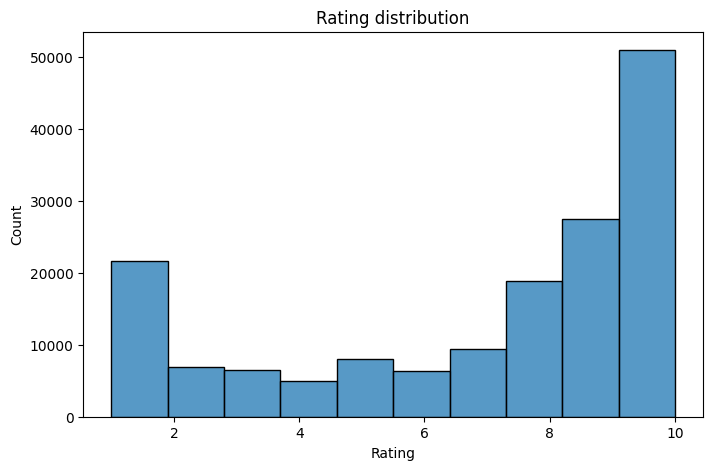

sentiment_label
positive    60.39
negative    24.85
neutral     14.76
Name: proportion, dtype: float64

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10)
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Sentiment Categories
def map_sentiment(r):
    if r <= 4: return 'negative'
    if r <= 7: return 'neutral'
    return 'positive'

df['sentiment_label'] = df['rating'].apply(map_sentiment)
display(df['sentiment_label'].value_counts(normalize=True).mul(100).round(2))

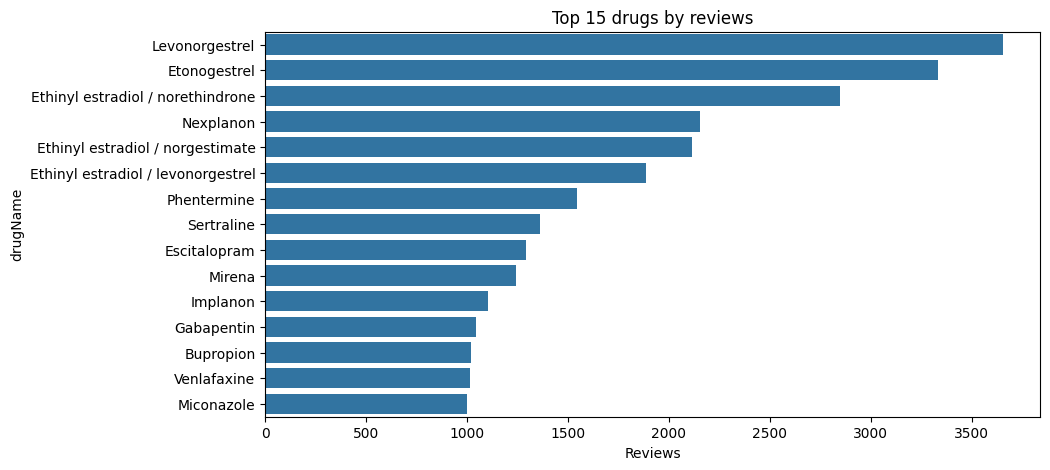

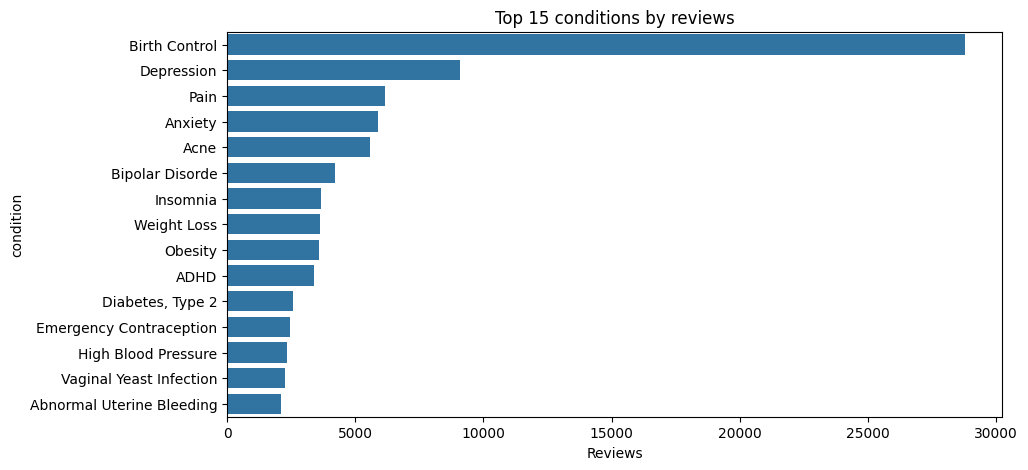

In [ ]:
T = 15
top_drugs = df['drugName'].value_counts().head(T)
top_conditions = df['condition'].value_counts().head(T)

# Visualization of drugs by reviews
plt.figure(figsize=(10,5))
sns.barplot(x=top_drugs.values, y=top_drugs.index)
plt.title(f"Top {T} drugs by reviews")
plt.xlabel("Reviews")
plt.show()

# Visualization of condition by reviews
plt.figure(figsize=(10,5))
sns.barplot(x=top_conditions.values, y=top_conditions.index)
plt.title(f"Top {T} conditions by reviews")
plt.xlabel("Reviews")
plt.show()

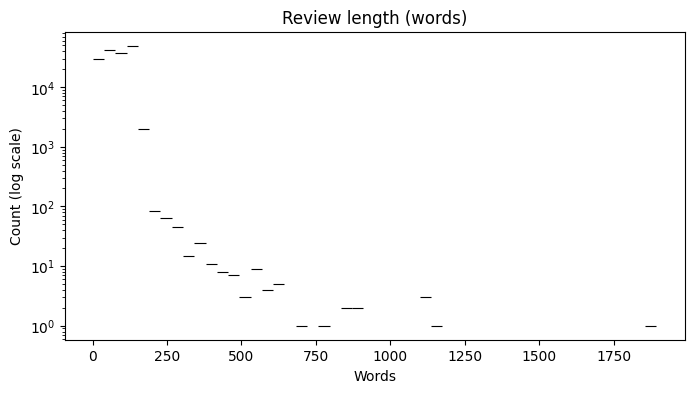

In [ ]:
# Review length features
df['review_length_chars'] = df['review'].astype(str).apply(len)
df['review_length_words'] = df['review'].astype(str).apply(lambda x: len(x.split()))

df[['review_length_chars','review_length_words']].describe()

# Histogram of lengths
plt.figure(figsize=(8,4))
sns.histplot(df['review_length_words'])
plt.title("Review length (words)")
plt.xlabel("Words")
plt.ylabel("Count (log scale)")
plt.show()

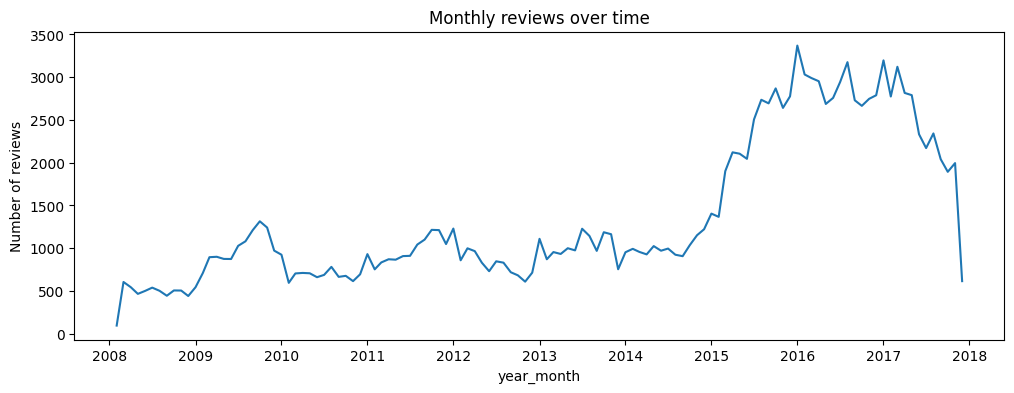

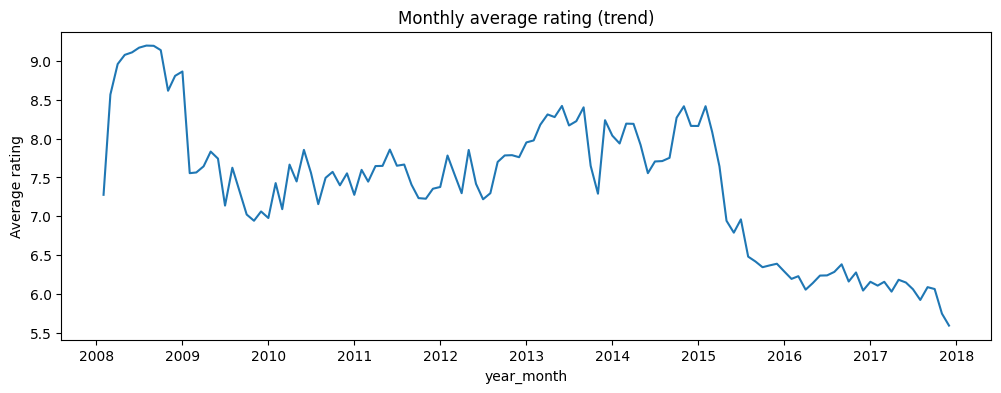

In [15]:
 # Parse date safely
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year_month'] = df['date'].dt.to_period('M')
    
    #Group by month
    monthly = df.groupby('year_month').agg(
        reviews_count=('review', 'count'),
        avg_rating=('rating','mean')
    ).reset_index()

    #Convert year_month back to timestamp
    monthly['year_month'] = monthly['year_month'].dt.to_timestamp()
    
    # Number of reviews per month
    plt.figure(figsize=(12,4))
    sns.lineplot(data=monthly, x='year_month', y='reviews_count')
    plt.ylabel('Number of reviews')
    plt.title("Monthly reviews over time")
    plt.show()

    # Average rating per month
    plt.figure(figsize=(12,4))
    sns.lineplot(data=monthly, x='year_month', y='avg_rating')
    plt.ylabel("Average rating")
    plt.title("Monthly average rating (trend)")
    plt.show()
else:
    print("No 'date' column found.")

In [ ]:
# Import libraries
from scipy.stats import shapiro, levene, kruskal, f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

,count,mean,median,std
drugName,,,,
Levonorgestrel,3657,7.391031,9.0,3.130234
Etonogestrel,3336,5.802458,6.0,3.316617
Ethinyl estradiol / norethindrone,2850,5.591930,6.0,3.406496
Nexplanon,2156,5.673006,6.0,3.329435
Ethinyl estradiol / norgestimate,2117,5.856873,7.0,3.287545
Ethinyl estradiol / levonorgestrel,1888,5.799258,6.0,3.283538
Phentermine,1543,8.786131,10.0,1.977405
Sertraline,1360,7.497794,9.0,2.869493


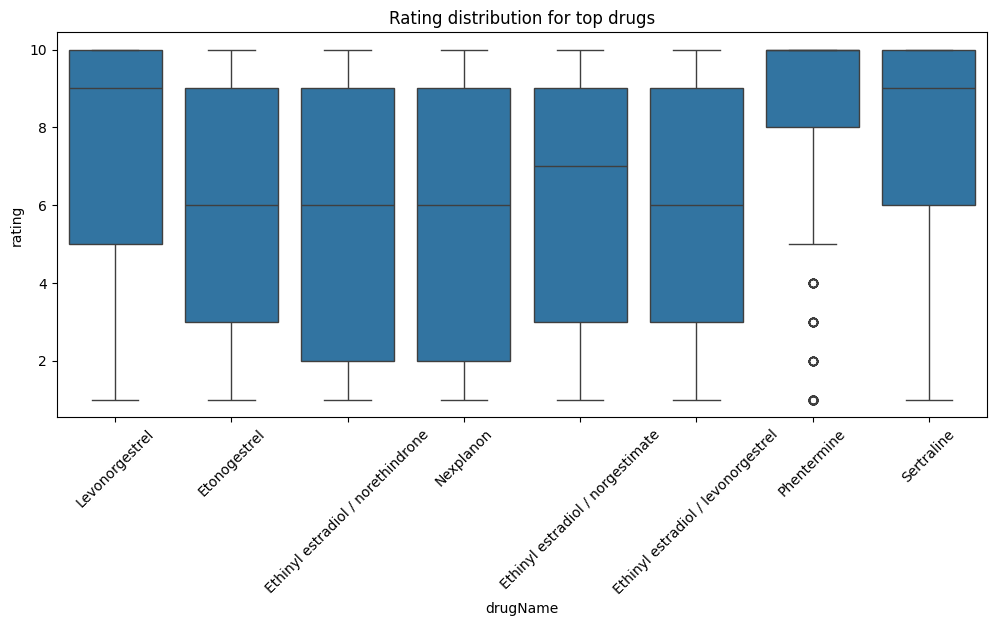

Kruskal-Wallis H-stat: 1903.8117780076336 p-value: 0.0
                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                            
              group1                             group2              meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------------------------------------------
Ethinyl estradiol / levonorgestrel Ethinyl estradiol / norethindrone  -0.2073 0.3491 -0.4924  0.0778  False
Ethinyl estradiol / levonorgestrel  Ethinyl estradiol / norgestimate   0.0576 0.9992 -0.2465  0.3618  False
Ethinyl estradiol / levonorgestrel                      Etonogestrel   0.0032    1.0 -0.2735  0.2799  False
Ethinyl estradiol / levonorgestrel                    Levonorgestrel   1.5918    0.0  1.3195  1.8641   True
Ethinyl estradiol / levonorgestrel                         Nexplanon  -0.1263 0.9122 -0.4291  0.1766  False
Ethinyl estradiol / levonorgestrel                       Phentermine   2.9869    

In [18]:
K = 8
topK = df['drugName'].value_counts().head(K).index.tolist()
df_topK = df[df['drugName'].isin(topK)]

# Summary table
group_stats = df_topK.groupby('drugName')['rating'].agg(['count','mean','median','std']).sort_values('count', ascending=False)
display(group_stats)

# Visualization
plt.figure(figsize=(12,5))
sns.boxplot(data=df_topK, x='drugName', y='rating', order=group_stats.index)
plt.xticks(rotation=45)
plt.title("Rating distribution for top drugs")
plt.show()

# Statistical test
groups = [group['rating'].values for name, group in df_topK.groupby('drugName')]

stat, p = kruskal(*groups)
print("Kruskal-Wallis H-stat:", stat, "p-value:", p)

# If p < 0.05 then run pairwise
tukey = pairwise_tukeyhsd(endog=df_topK['rating'], groups=df_topK['drugName'], alpha=0.05)
print(tukey.summary())


,count,mean,median,std
condition,,,,
Birth Control,28788,6.089933,7.0,3.305941
Depression,9069,7.099460,8.0,3.101117
Pain,6145,7.632221,9.0,2.928199
Anxiety,5904,7.691057,9.0,2.982997
Acne,5588,7.374195,9.0,3.042817


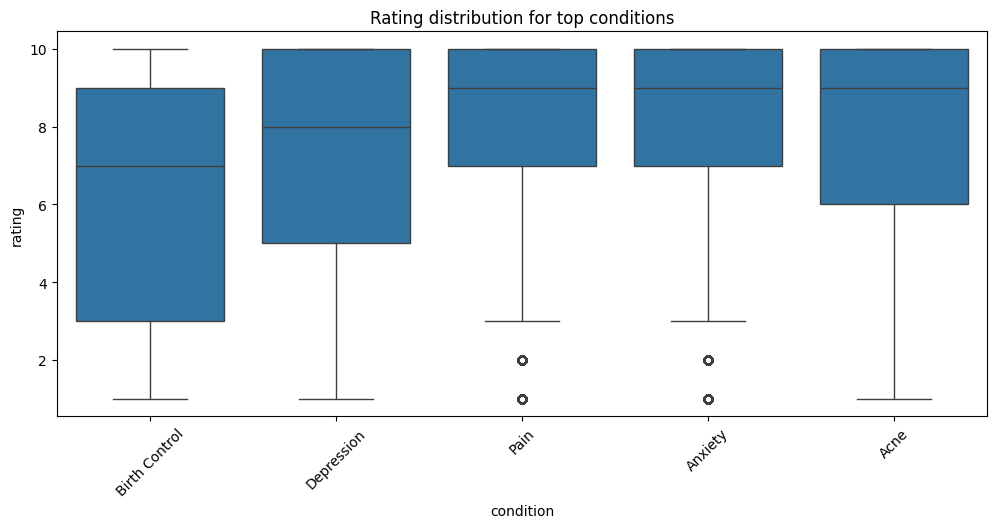

Kruskal-Wallis H-stat: 2546.48573606312 p-value: 0.0
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         Acne       Anxiety   0.3169    0.0  0.1553  0.4784   True
         Acne Birth Control  -1.2843    0.0 -1.4108 -1.1577   True
         Acne    Depression  -0.2747    0.0 -0.4219 -0.1275   True
         Acne          Pain    0.258 0.0001   0.098   0.418   True
      Anxiety Birth Control  -1.6011    0.0 -1.7248 -1.4775   True
      Anxiety    Depression  -0.5916    0.0 -0.7364 -0.4468   True
      Anxiety          Pain  -0.0588 0.8475 -0.2166  0.0989  False
Birth Control    Depression   1.0095    0.0  0.9053  1.1138   True
Birth Control          Pain   1.5423    0.0  1.4206  1.6639   True
   Depression          Pain   0.5328    0.0  0.3897  0.6758   True
------------------------------------------------------------------


In [19]:
# Choose top N conditions
N = 5
top_conditions = df['condition'].value_counts().head(N).index.tolist()
df_topCond = df[df['condition'].isin(top_conditions)]

# Summary table
group_stats_cond = df_topCond.groupby('condition')['rating'].agg(['count','mean','median','std']).sort_values('count', ascending=False)
display(group_stats_cond)

# Visualization
plt.figure(figsize=(12,5))
sns.boxplot(data=df_topCond, x='condition', y='rating', order=group_stats_cond.index)
plt.xticks(rotation=45)
plt.title("Rating distribution for top conditions")
plt.show()

# Statistical test
groups = [group['rating'].dropna().values for name, group in df_topCond.groupby('condition')]
stat, p = kruskal(*groups)
print("Kruskal-Wallis H-stat:", stat, "p-value:", p)

# If significant, run pairwise Tukey HSD
if p < 0.05:
    tukey = pairwise_tukeyhsd(endog=df_topCond['rating'], groups=df_topCond['condition'], alpha=0.05)
    print(tukey.summary())
else:
    print("No significant difference across conditions.")

Correlation rating <-> usefulCount: 0.23418537506366544


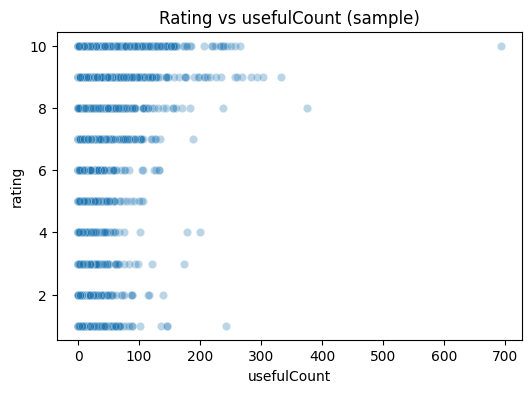

In [20]:
# If usefulCount exists, correlation with rating
if 'usefulCount' in df.columns:
    print("Correlation rating <-> usefulCount:", df['rating'].corr(df['usefulCount']))

    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df.sample(5000, random_state=1), x='usefulCount', y='rating', alpha=0.3)
    plt.title("Rating vs usefulCount (sample)")
    plt.show()

In [24]:
# Extremely long reviews (top 10)
display(df.sort_values('review_length_words', ascending=False).head(10)[['drugName','condition','review_length_words','rating']])

# Suspicious ratings (out-of-range)
print("Ratings min/max:", df['rating'].min(), df['rating'].max())

# Check for many missing dates after parsing
print("Parsed dates missing:", df['date'].isnull().sum() if 'date' in df.columns else "no date column")

,drugName,condition,review_length_words,rating
75663,Venlafaxine,Migraine,1894,2
139700,Prozac,Obsessive Compulsive Disorde,1162,10
141360,Copper,Birth Control,1107,10
43247,Levonorgestrel,Emergency Contraception,1103,9
69307,Plan B One-Step,Emergency Contraception,1103,9
153004,Zecuity,Migraine,881,3
93238,Sumatriptan,Migraine,881,3
111897,Phillips' Milk of Magnesia,Constipation,834,10
22050,Magnesium hydroxide,Constipation,834,10
150077,Quetiapine,Insomnia,765,8


Ratings min/max: 1 10
Parsed dates missing: 0


In [25]:
# Remove duplicates
df_clean = df.drop_duplicates().copy()
df_clean['condition'] = df_clean['condition'].fillna("Unknown")

# Save cleaned CSV
df_clean.to_csv("data/drugreviews_clean.csv", index=False) 
